In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the dataset
data = pd.read_csv("BankChurners_Cleaned.csv")

In [5]:
# General information about the dataset
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                      

In [6]:
# Display the first few rows of the dataset
print("\nFirst 5 Rows of the Dataset:")
print(data.head())

# Summary statistics
print("\nSummary Statistics:")
print(data.describe().T)

# Inspect data types
print("\nData Types:")
print(data.dtypes)

# Check the number of rows and columns
print("\nDataset Shape:")
print(data.shape)



First 5 Rows of the Dataset:
   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  77

In [7]:
# Check for missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

print("\nMissing Values Count:")
print(missing_values)

print("\nPercentage of Missing Values:")
print(missing_percentage)

# Check the number of unique values in each column
print("\nNumber of Unique Values in Each Column:")
print(data.nunique())



Missing Values Count:
CLIENTNUM                                                                                                                                0
Attrition_Flag                                                                                                                           0
Customer_Age                                                                                                                             0
Gender                                                                                                                                   0
Dependent_count                                                                                                                          0
Education_Level                                                                                                                       1519
Marital_Status                                                                                                                         749
Inco


Descriptive Statistics for Numerical Columns:
                                                      count          mean  \
CLIENTNUM                                           10127.0  7.391776e+08   
Customer_Age                                        10127.0  4.632596e+01   
Dependent_count                                     10127.0  2.346203e+00   
Months_on_book                                      10127.0  3.592841e+01   
Total_Relationship_Count                            10127.0  3.812580e+00   
Months_Inactive_12_mon                              10127.0  2.341167e+00   
Contacts_Count_12_mon                               10127.0  2.455317e+00   
Credit_Limit                                        10127.0  8.631954e+03   
Total_Revolving_Bal                                 10127.0  1.162814e+03   
Avg_Open_To_Buy                                     10127.0  7.469140e+03   
Total_Amt_Chng_Q4_Q1                                10127.0  7.599407e-01   
Total_Trans_Amt              

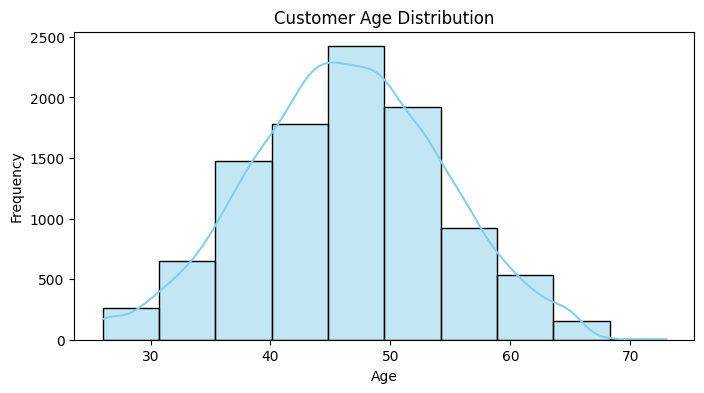

In [8]:
# Descriptive statistics for numerical columns
print("\nDescriptive Statistics for Numerical Columns:")
print(data.describe(include=['float64', 'int64']).T)

# Distribution of a sample numerical column (e.g., 'Customer_Age' if present)
plt.figure(figsize=(8, 4))
sns.histplot(data['Customer_Age'], kde=True, color='skyblue', bins=10)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

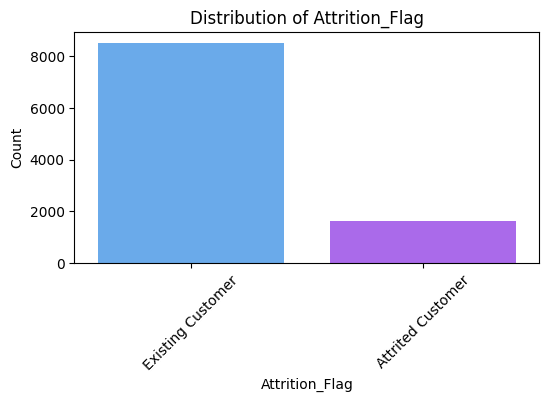

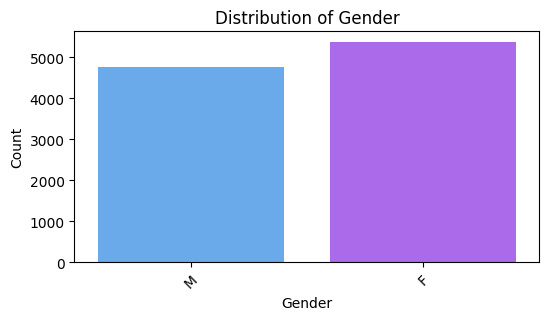

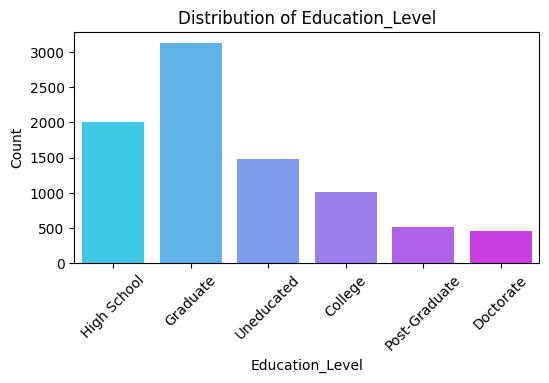

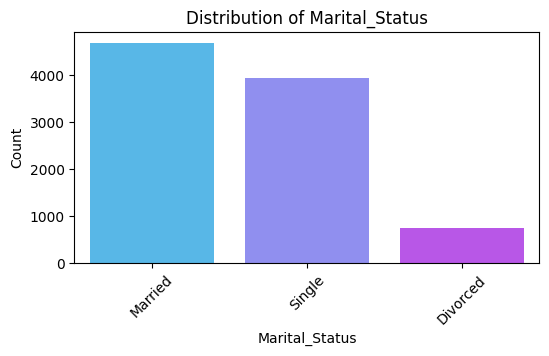

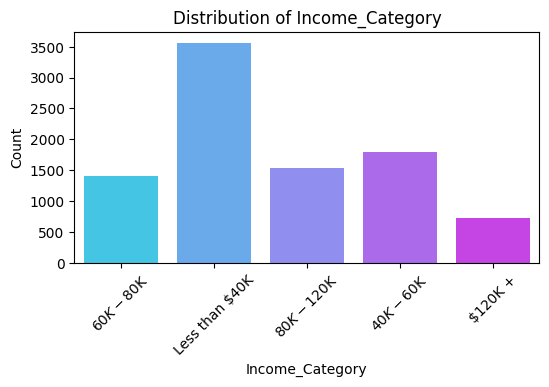

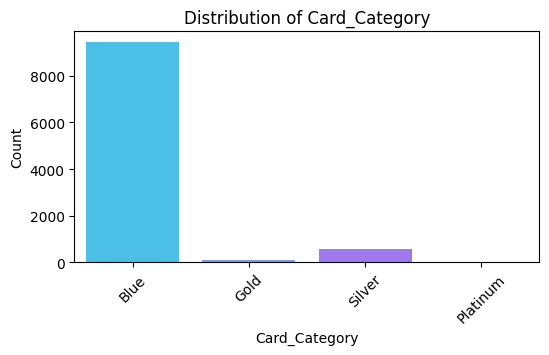

In [9]:
# Countplot for categorical columns (customize as per your dataset)
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, data=data, palette='cool')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

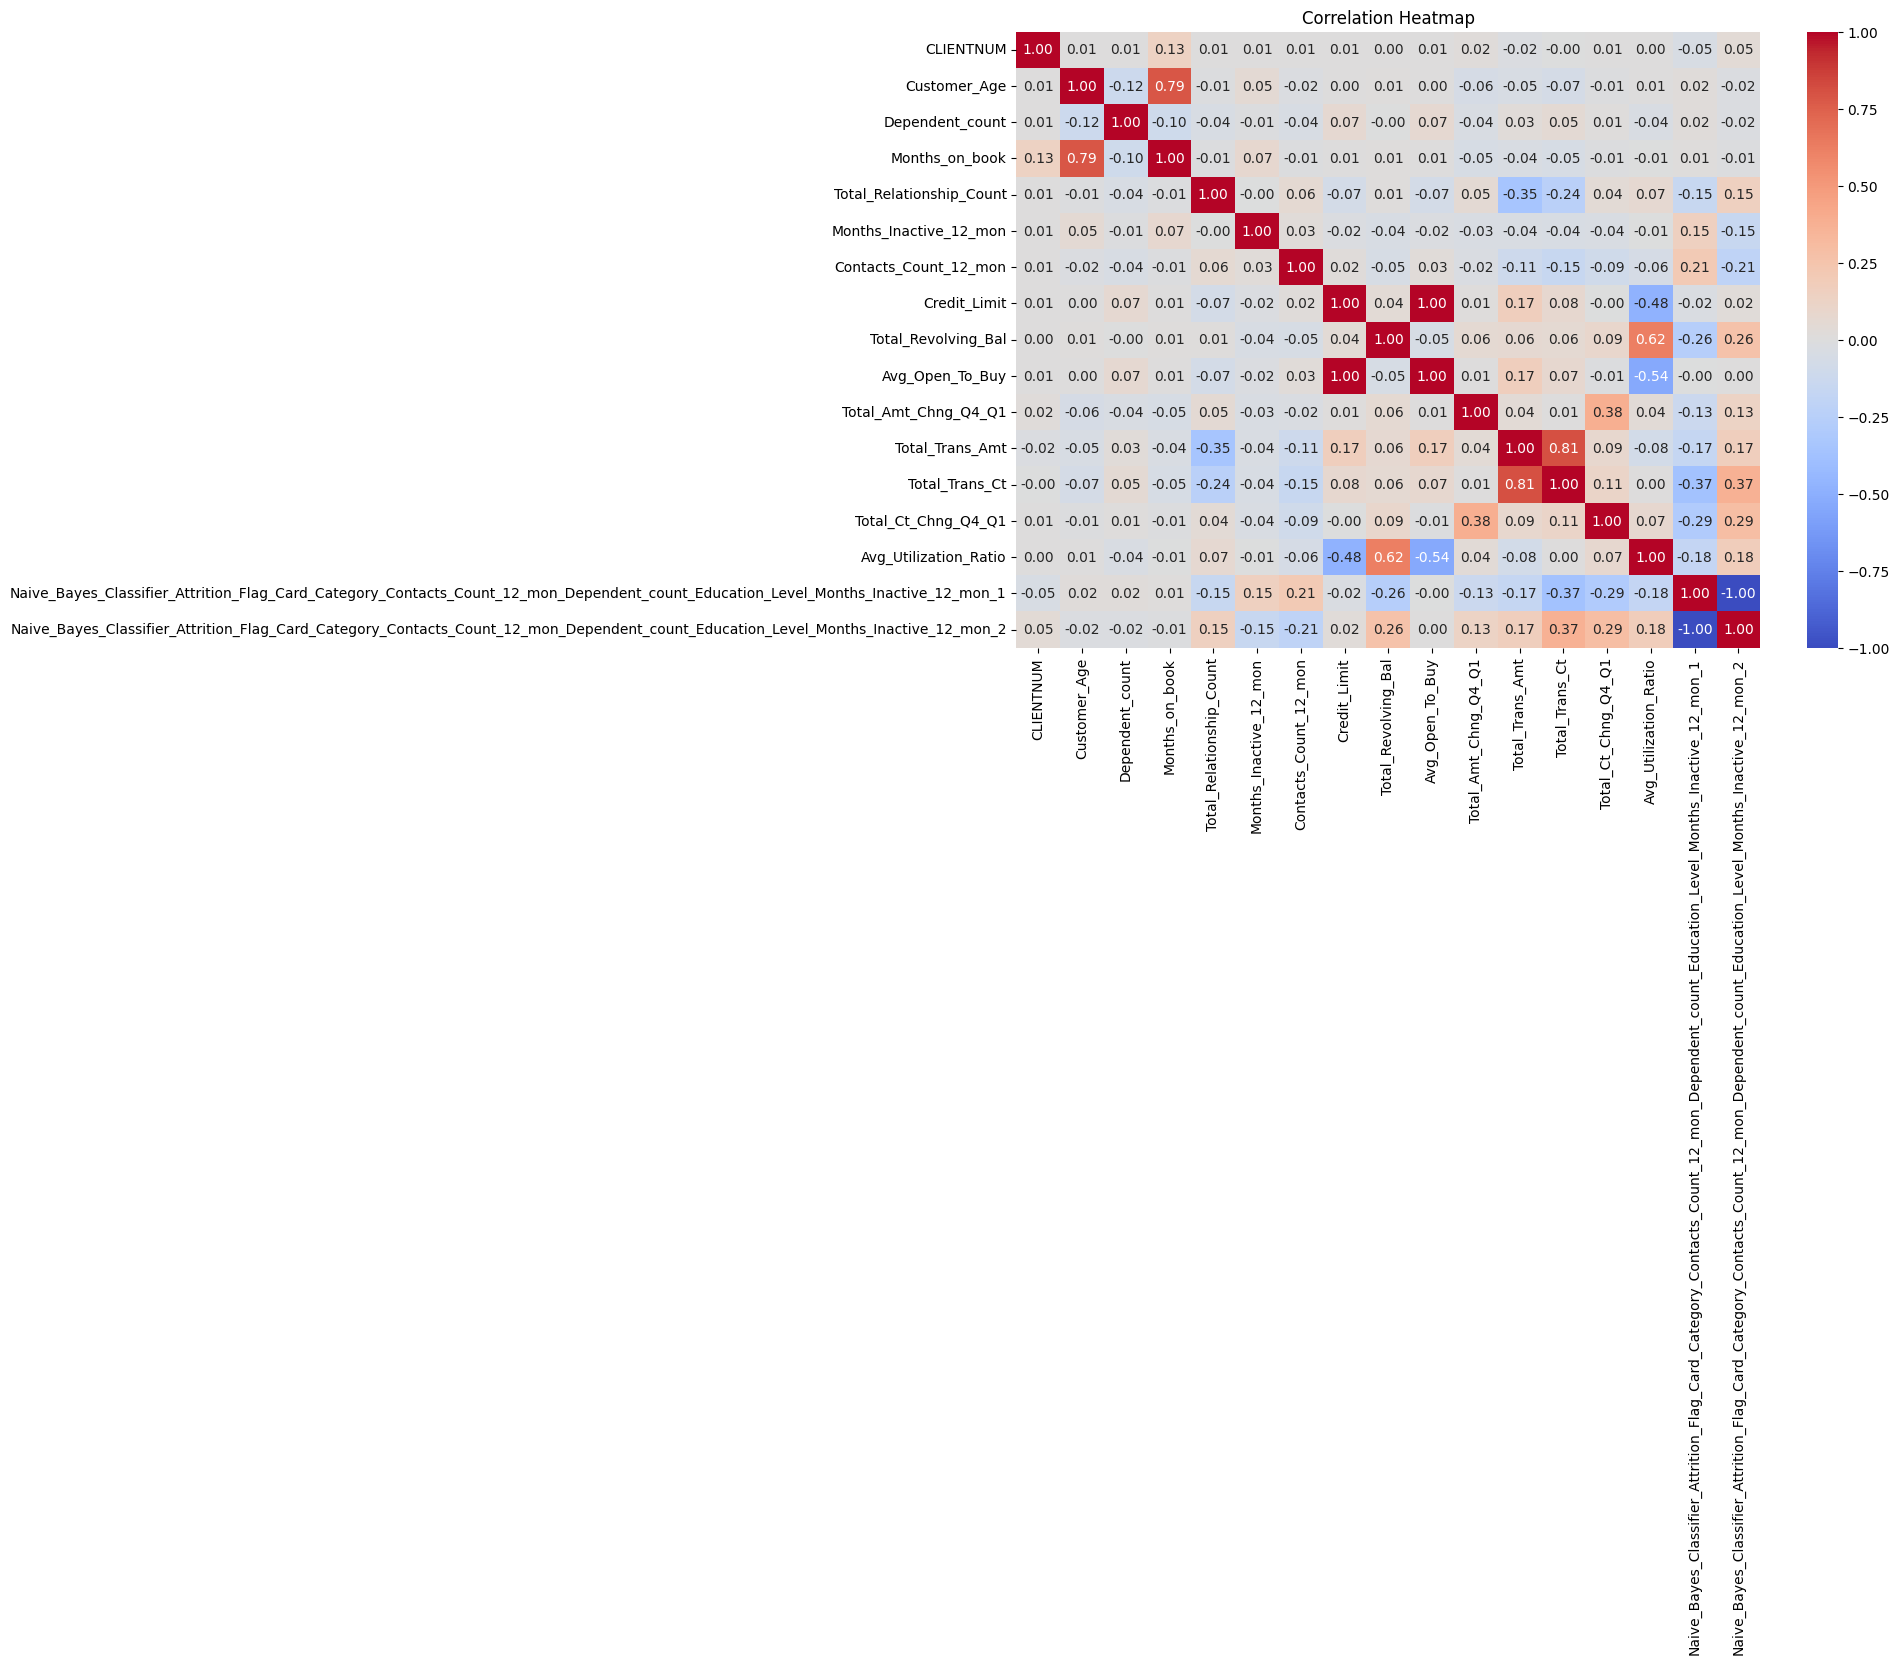

In [11]:
# Select only numeric columns for the correlation matrix
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

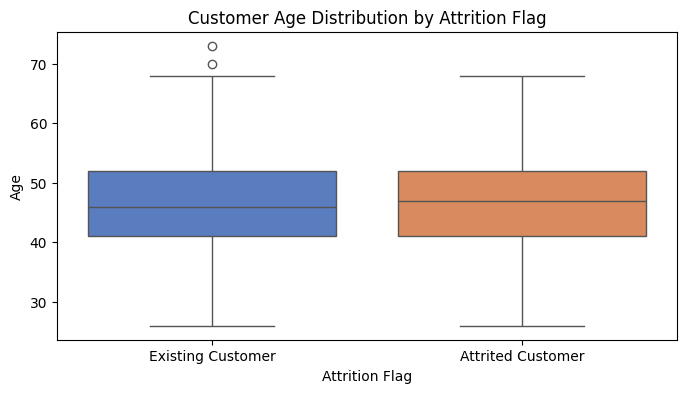

In [12]:

# Boxplot for age distribution by churn status (example column 'Attrition_Flag' if present)
if 'Attrition_Flag' in data.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=data, palette='muted')
    plt.title("Customer Age Distribution by Attrition Flag")
    plt.xlabel("Attrition Flag")
    plt.ylabel("Age")
    plt.show()

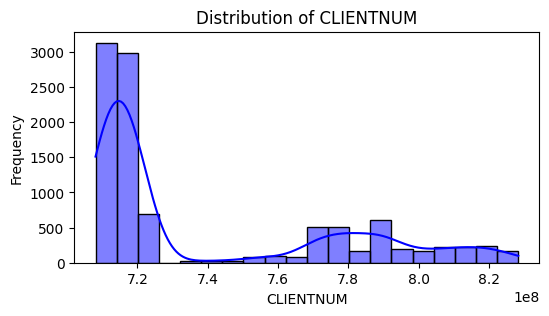

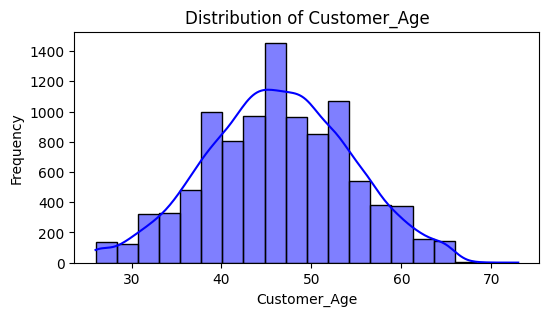

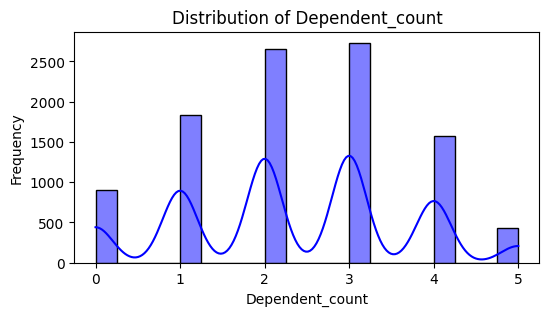

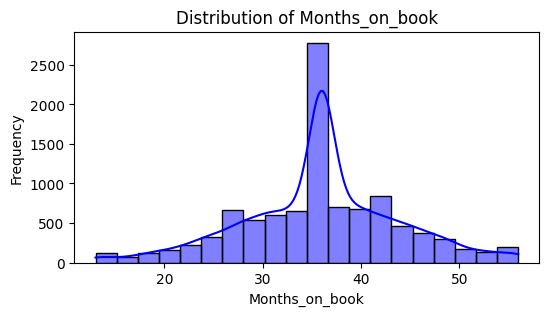

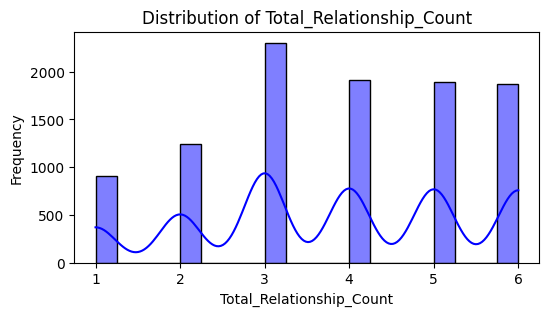

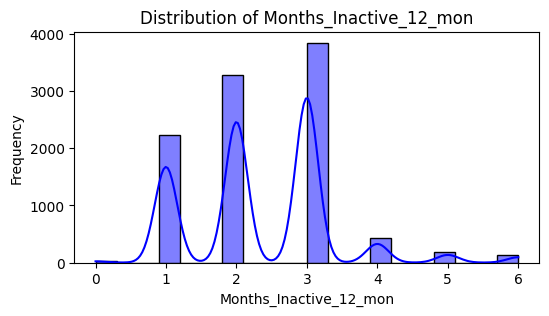

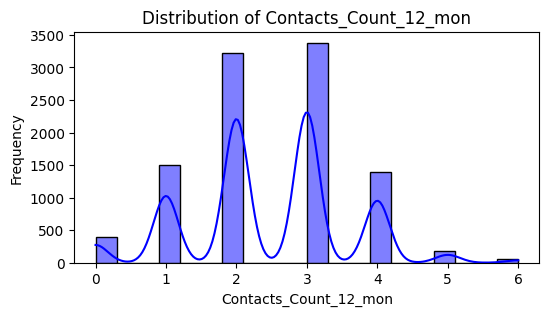

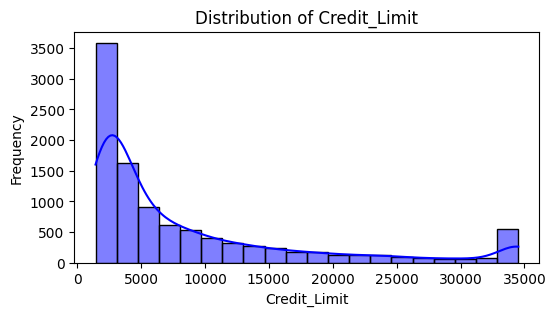

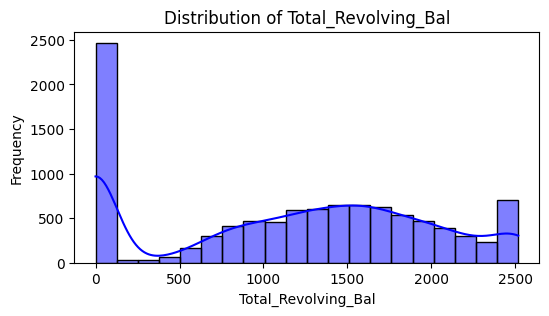

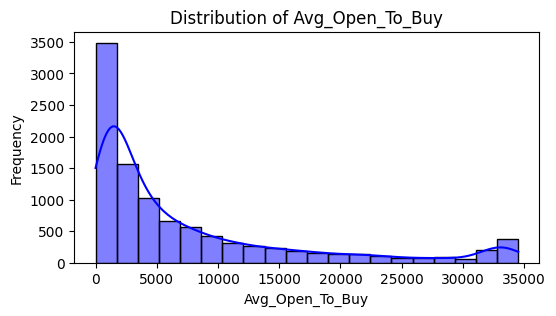

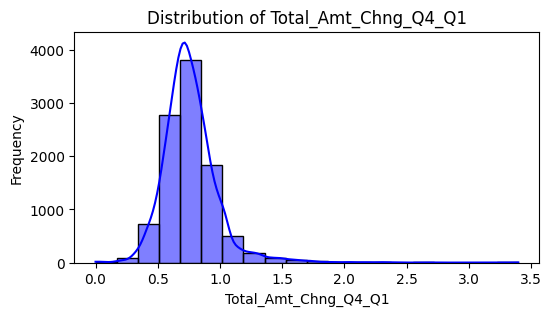

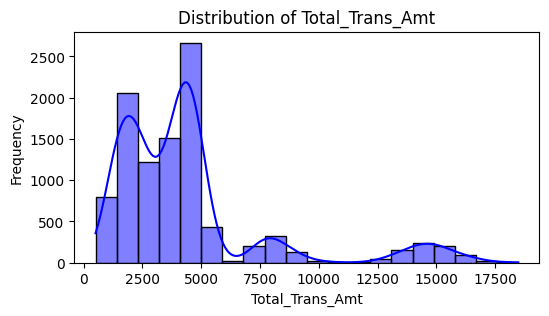

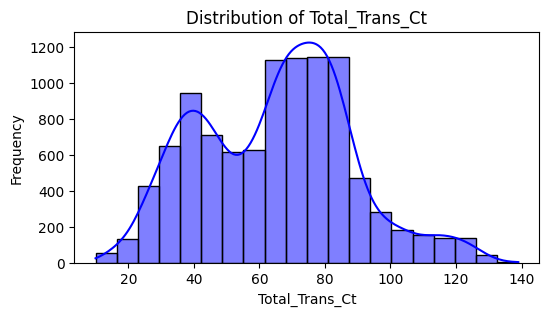

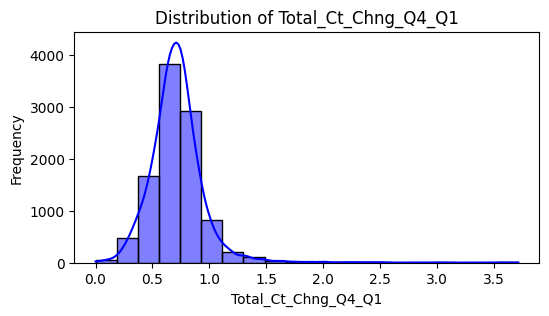

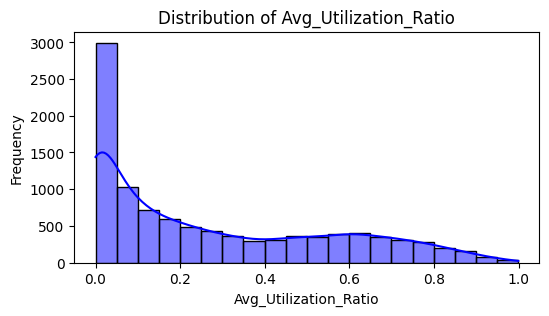

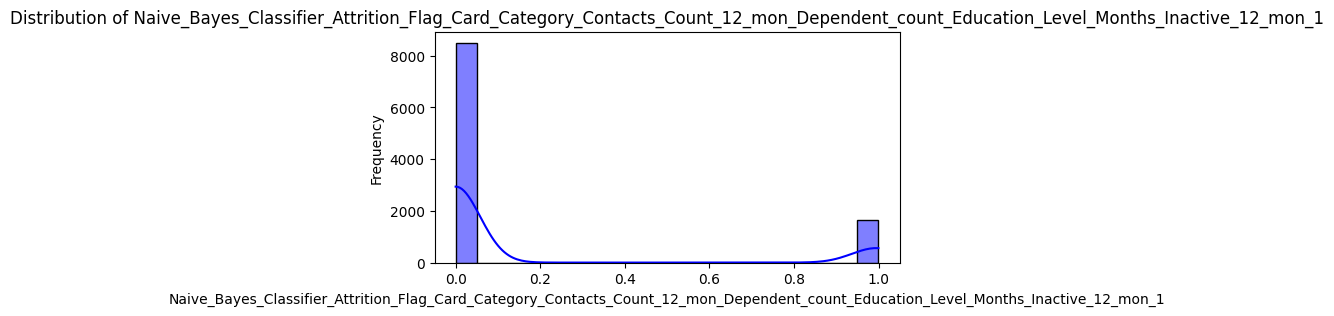

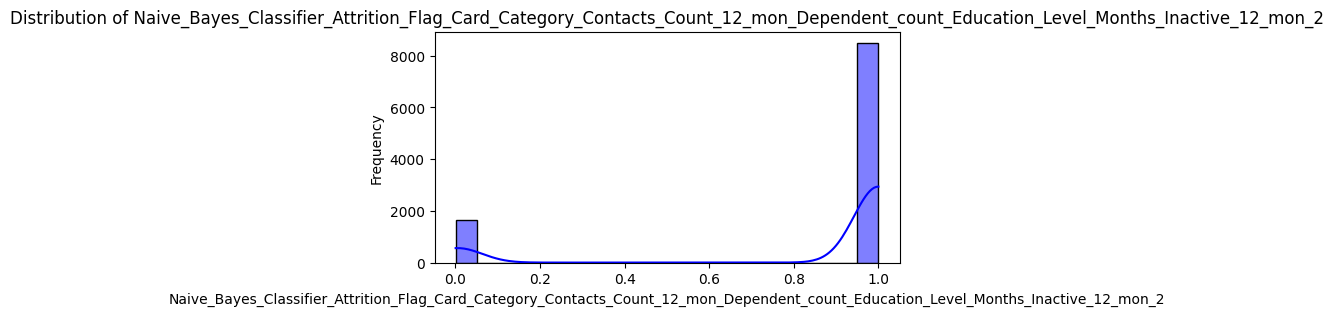

In [15]:
# Distribution of numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(data[col], kde=True, bins=20, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [16]:
# Display skewness for numerical columns
skewness = data[numerical_columns].skew()
print("\nSkewness of Numerical Columns:")
print(skewness)


Skewness of Numerical Columns:
CLIENTNUM                                                                                                                             0.995601
Customer_Age                                                                                                                         -0.033605
Dependent_count                                                                                                                      -0.020826
Months_on_book                                                                                                                       -0.106565
Total_Relationship_Count                                                                                                             -0.162452
Months_Inactive_12_mon                                                                                                                0.633061
Contacts_Count_12_mon                                                                                         